In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache

In [26]:
@lru_cache(maxsize=None)  
def fetch_data_from_source(parquet_file):
    df = pd.read_parquet(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{parquet_file}")
    return df

def fetch_data_csv(parquet_file):
    df = pd.read_csv(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{parquet_file}")
    return df

# Dataset import

In [5]:
f1_2022_df = fetch_data_from_source('f1sim-data-2022.parquet')
f1_2022_df.sort_values(by=["SESSION_IDENTIFIER", "FRAME"], inplace=True)
f1_2022_df.reset_index(drop=True, inplace=True)
sector1_22 = f1_2022_df[f1_2022_df["SECTOR"]==0]

In [6]:
f1_2023_df = fetch_data_from_source('f1sim-data-2023.parquet')
f1_2023_df.sort_values(by=["SESSION_IDENTIFIER", "FRAME"], inplace=True)
f1_2023_df.reset_index(drop=True, inplace=True)
sector1_23 = f1_2023_df[f1_2023_df["SECTOR"]==0]

In [7]:
turns_df = fetch_data_csv('f1sim-ref-turns.csv')
left_df = fetch_data_csv('f1sim-ref-left.csv')
right_df = fetch_data_csv('f1sim-ref-right.csv')
line_df = fetch_data_csv('f1sim-ref-line.csv')

# Pitch, Yaw and Roll

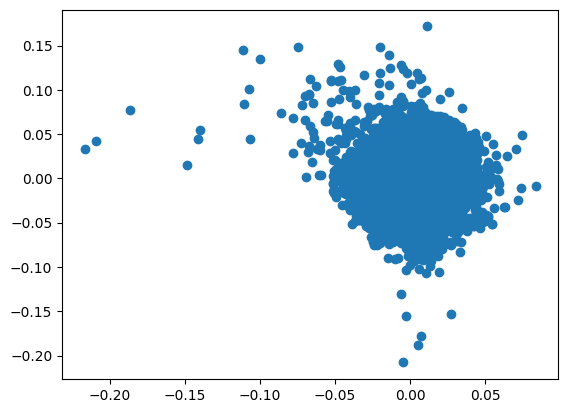

In [ ]:
plt.scatter(f1_2022_df['PITCH'], f1_2022_df['ROLL'])

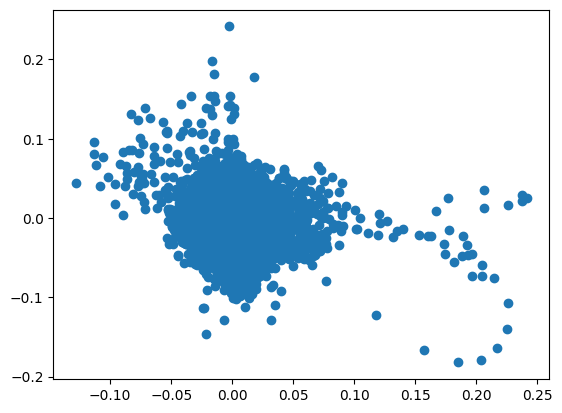

In [ ]:
plt.scatter(f1_2023_df['PITCH'], f1_2023_df['ROLL'])

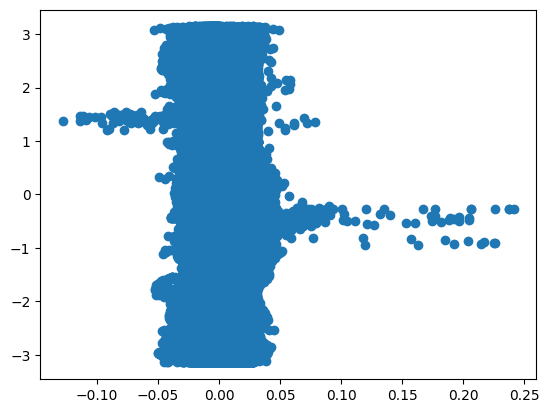

In [ ]:
plt.scatter(f1_2023_df['PITCH'], f1_2023_df['YAW'])

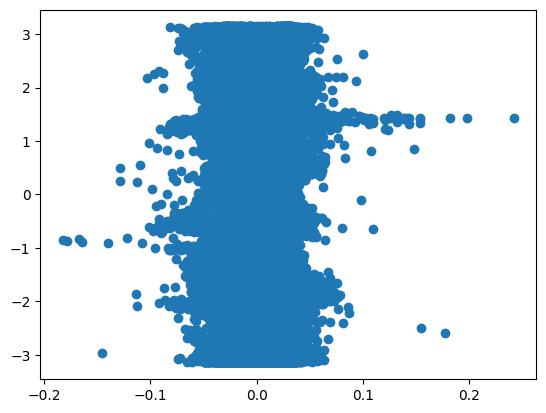

In [ ]:
plt.scatter(f1_2023_df['ROLL'], f1_2023_df['YAW'])

<function matplotlib.pyplot.show(close=None, block=None)>

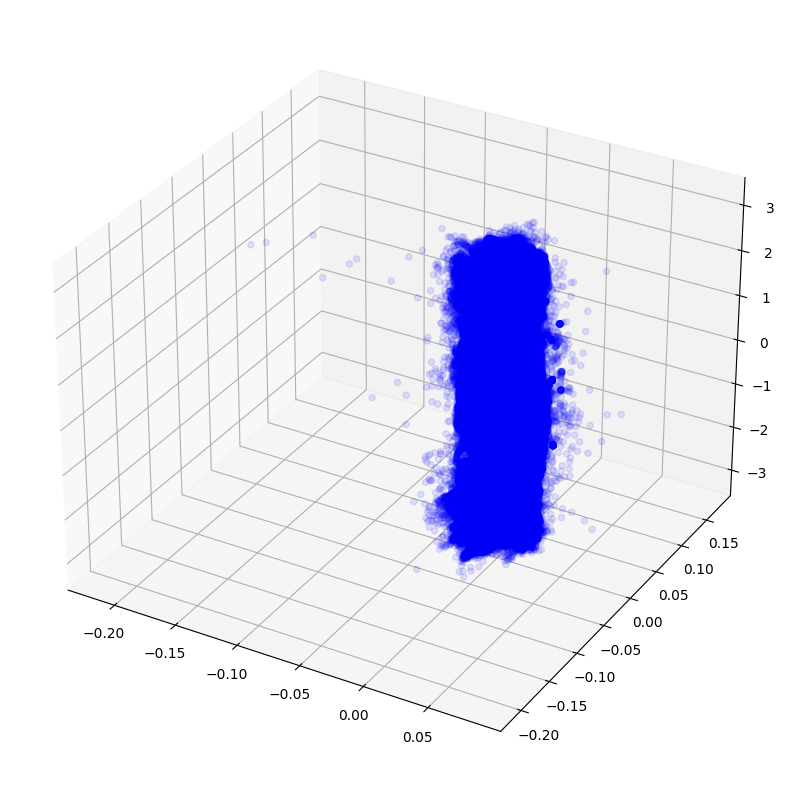

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2022_df['PITCH']
Y = f1_2022_df['ROLL']
Z = f1_2022_df['YAW']
ax.scatter(X,Y,Z, c='blue', alpha=0.1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

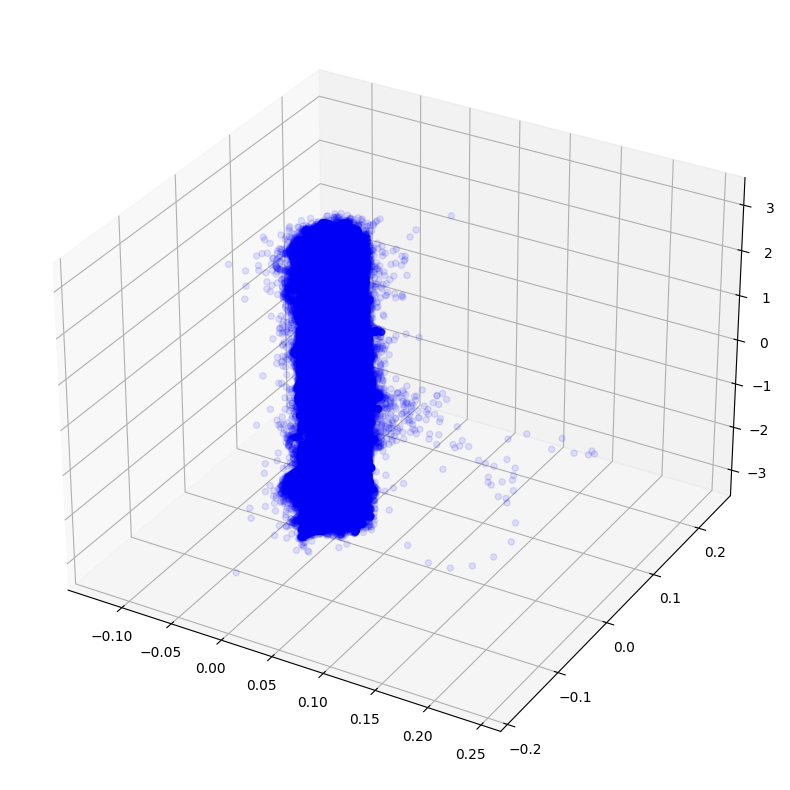

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df['PITCH']
Y = f1_2023_df['ROLL']
Z = f1_2023_df['YAW']
ax.scatter(X,Y,Z, c='blue', alpha=0.1)
plt.show

# Lap Distance

<function matplotlib.pyplot.show(close=None, block=None)>

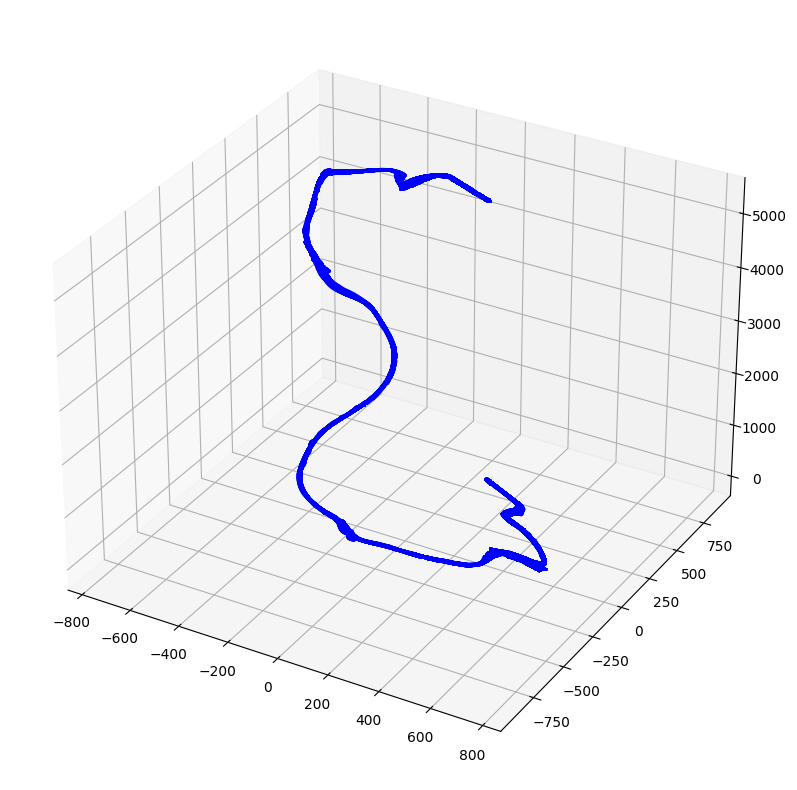

In [24]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df["WORLDPOSX"]
Y = f1_2023_df["WORLDPOSY"]
Z = f1_2023_df["LAP_DISTANCE"]
ax.scatter(X,Y,Z, c='blue', s=1)
plt.show

# World Direction

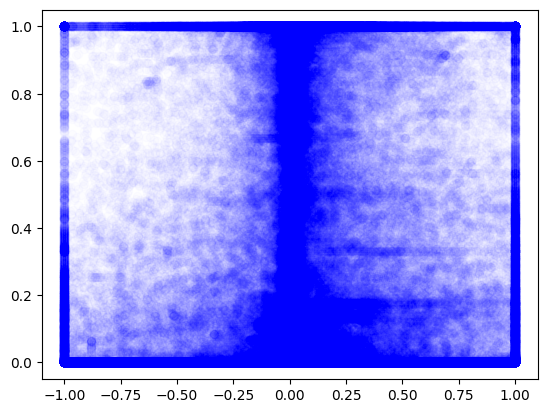

In [22]:
spin = f1_2023_df[f1_2023_df["GEAR"]==-1]
no_spin = f1_2023_df[f1_2023_df["GEAR"]!=-1]
plt.scatter(no_spin["STEERING"],no_spin["BRAKE"], c='blue', alpha = 0.01)
# plt.scatter(spin["STEERING"],spin["BRAKE"], c='red', alpha = 0.1)

<function matplotlib.pyplot.show(close=None, block=None)>

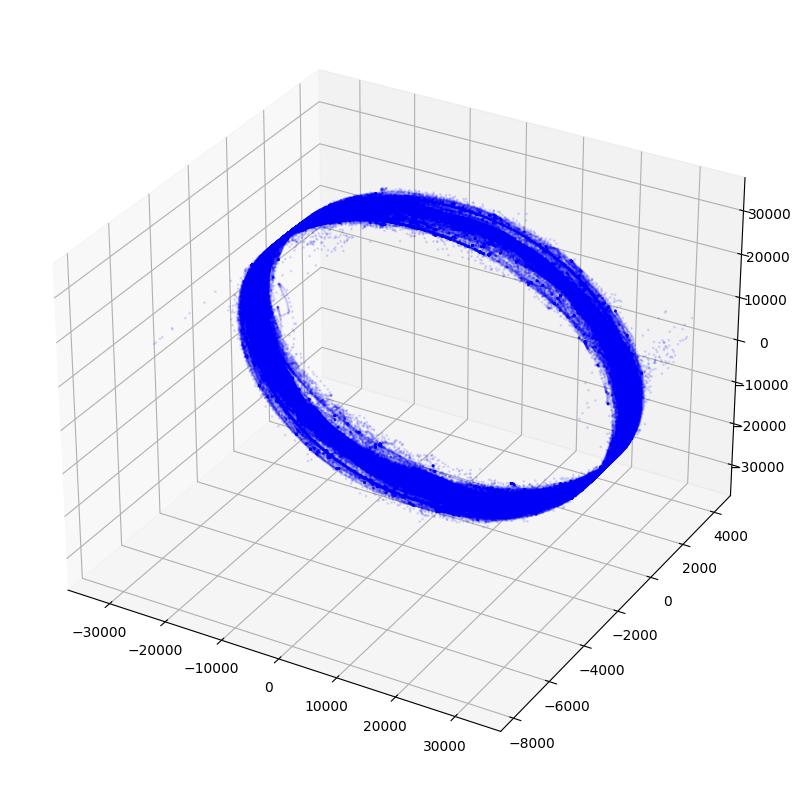

In [10]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df["WORLDFORWARDDIRX"]
Y = f1_2023_df["WORLDFORWARDDIRY"]
Z = f1_2023_df["WORLDFORWARDDIRZ"]
ax.scatter(X,Y,Z, c='blue', alpha = 0.1, s=1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

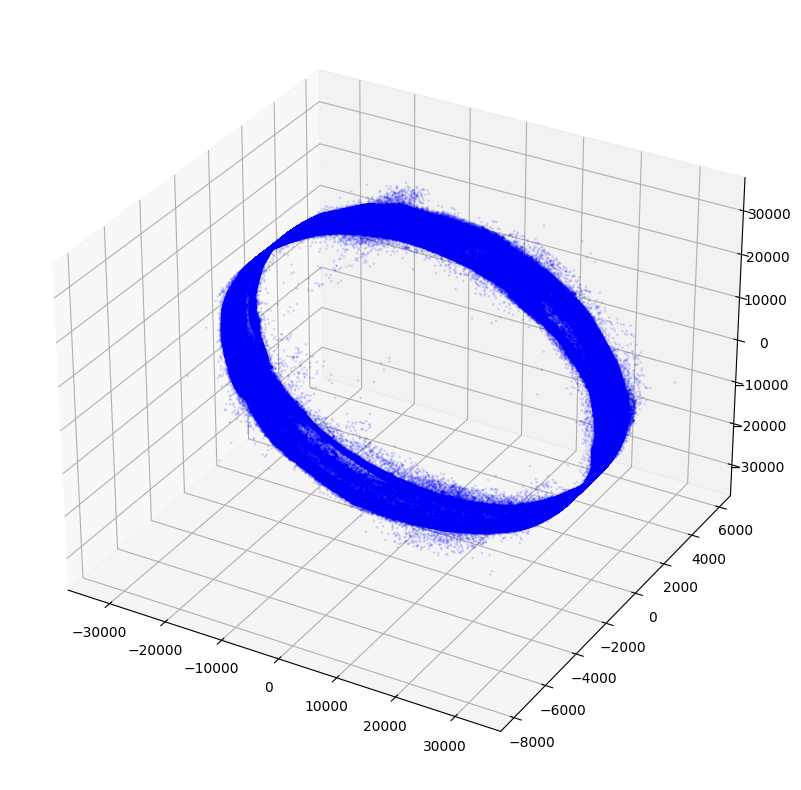

In [11]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df["WORLDRIGHTDIRX"]
Y = f1_2023_df["WORLDRIGHTDIRY"]
Z = f1_2023_df["WORLDRIGHTDIRZ"]
ax.scatter(X,Y,Z, c='blue', alpha = 0.1, s=1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

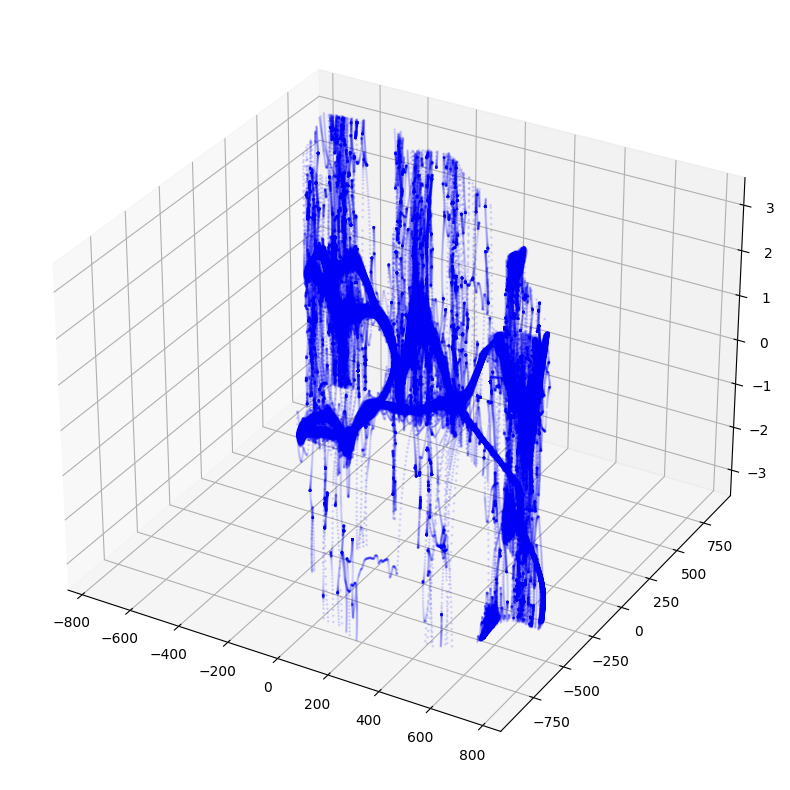

In [9]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
X = f1_2023_df["WORLDPOSX"]
Y = f1_2023_df["WORLDPOSY"]
Z = f1_2023_df["YAW"]
ax.scatter(X,Y,Z, c='blue', alpha = 0.1, s=1)
plt.show

# Exploring forward direction

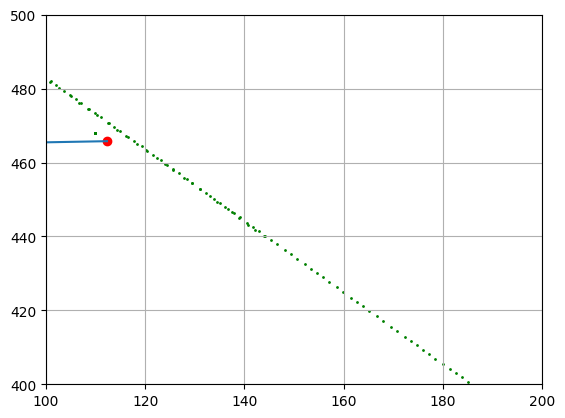

In [75]:
s=sector1_22[0:1]
x=[s["WORLDPOSX"], s["WORLDFORWARDDIRX"]]
y=[s["WORLDPOSY"], s["WORLDFORWARDDIRY"]]
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"], c='green', s=1)
plt.scatter(s["WORLDPOSX"], s["WORLDPOSY"], c='red')
plt.plot (x,y)
plt.scatter(s["WORLDFORWARDDIRX"], s["WORLDFORWARDDIRY"])
plt.xlim(100, 200)
plt.ylim(400, 500)
plt.grid(True)
plt.show()

In [57]:
y = sector1_22[sector1_22["GEAR"]==-1]
y[(y["WORLDPOSX"]>430) & (y["WORLDPOSX"]<500)]

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,...,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ
32682,7.551125e+17,4456,1,0,693.300964,21279,57748,34433,207066,114885,...,0.004544,496.394775,-54.937069,3.176246,26803.0,528.0,-18840.0,18845.0,-148.0,26805.0
57841,1.530264e+18,2835,1,0,1655.193604,96196,51021,26048,196280,119211,...,-0.004273,459.601532,-765.334229,3.456301,-27525.0,415.0,-17772.0,17774.0,140.0,-27526.0
57842,1.530264e+18,2839,1,0,1655.190308,96312,51021,26048,196280,119211,...,-0.004977,459.606110,-765.335876,3.457143,-27534.0,417.0,-17758.0,17761.0,163.0,-27535.0
57843,1.530264e+18,2840,1,0,1655.189087,96362,51021,26048,196280,119211,...,-0.005039,459.607574,-765.335876,3.457197,-27535.0,417.0,-17756.0,17759.0,165.0,-27536.0
57844,1.530264e+18,2841,1,0,1655.187378,96429,51021,26048,196280,119211,...,-0.005136,459.609497,-765.335876,3.457357,-27537.0,418.0,-17752.0,17756.0,168.0,-27538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646998,1.598817e+19,4688,1,0,616.096985,27377,11337,36744,182486,134405,...,0.006085,432.663849,-10.414639,3.077858,-25085.0,310.0,21078.0,-21080.0,-199.0,-25084.0
646999,1.598817e+19,4689,1,0,616.097046,27427,11337,36744,182486,134405,...,0.006169,432.663849,-10.414716,3.077932,-25085.0,309.0,21078.0,-21080.0,-202.0,-25084.0
647000,1.598817e+19,4690,1,0,616.097229,27494,11337,36744,182486,134405,...,0.006184,432.663849,-10.415008,3.077907,-25085.0,310.0,21078.0,-21080.0,-202.0,-25085.0
647001,1.598817e+19,4691,1,0,616.097351,27544,11337,36744,182486,134405,...,0.006177,432.663788,-10.415192,3.077914,-25085.0,309.0,21078.0,-21080.0,-202.0,-25084.0


In [58]:
y["SESSION_IDENTIFIER"][646998]

1.5988171178494409e+19

In [62]:
y.columns

Index(['SESSION_IDENTIFIER', 'FRAME', 'LAP_NUM', 'SECTOR', 'LAP_DISTANCE',
       'CURRENT_LAP_TIME_MS', 'SECTOR_1_TIME_MS', 'SECTOR_2_TIME_MS',
       'LAP_TIME_MS', 'SECTOR_3_MS', 'SPEED_KPH', 'THROTTLE', 'BRAKE', 'GEAR',
       'ENGINE_RPM', 'STEERING', 'YAW', 'PITCH', 'ROLL', 'WORLDPOSX',
       'WORLDPOSY', 'WORLDPOSZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY',
       'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY',
       'WORLDRIGHTDIRZ'],
      dtype='object')

In [59]:
z=y[y["SESSION_IDENTIFIER"]==1.5988171178494409e+19]

In [61]:
z

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,...,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ
646887,1.598817e+19,4565,1,0,578.802979,21137,11337,36744,182486,134405,...,0.011794,406.255096,16.139189,3.032184,32745.0,290.0,1149.0,-1145.0,-386.0,32744.0
646888,1.598817e+19,4566,1,0,578.878235,21187,11337,36744,182486,134405,...,0.019703,406.315063,16.115517,3.030106,32719.0,194.0,1753.0,-1749.0,-645.0,32713.0
646889,1.598817e+19,4567,1,0,578.940796,21237,11337,36744,182486,134405,...,0.018020,406.384064,16.097109,3.026620,32685.0,213.0,2306.0,-2302.0,-590.0,32680.0
646890,1.598817e+19,4568,1,0,579.038940,21304,11337,36744,182486,134405,...,0.017104,406.502258,16.079338,3.029988,32629.0,246.0,2986.0,-2982.0,-560.0,32626.0
646891,1.598817e+19,4569,1,0,579.122192,21354,11337,36744,182486,134405,...,0.016051,406.607697,16.069971,3.031408,32583.0,281.0,3449.0,-3445.0,-525.0,32581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646998,1.598817e+19,4688,1,0,616.096985,27377,11337,36744,182486,134405,...,0.006085,432.663849,-10.414639,3.077858,-25085.0,310.0,21078.0,-21080.0,-199.0,-25084.0
646999,1.598817e+19,4689,1,0,616.097046,27427,11337,36744,182486,134405,...,0.006169,432.663849,-10.414716,3.077932,-25085.0,309.0,21078.0,-21080.0,-202.0,-25084.0
647000,1.598817e+19,4690,1,0,616.097229,27494,11337,36744,182486,134405,...,0.006184,432.663849,-10.415008,3.077907,-25085.0,310.0,21078.0,-21080.0,-202.0,-25085.0
647001,1.598817e+19,4691,1,0,616.097351,27544,11337,36744,182486,134405,...,0.006177,432.663788,-10.415192,3.077914,-25085.0,309.0,21078.0,-21080.0,-202.0,-25084.0


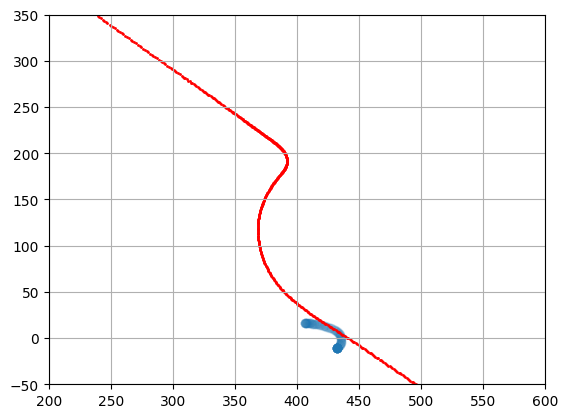

In [60]:
plt.scatter(z["WORLDPOSX"], z["WORLDPOSY"], alpha=0.1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"], c='red', s=1)
plt.xlim(200, 600)
plt.ylim(-50, 350)
plt.grid(True)
plt.show()

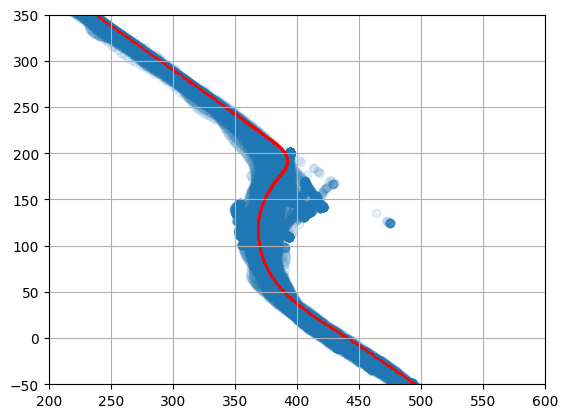

In [63]:
plt.scatter(sector1_22["WORLDPOSX"], sector1_22["WORLDPOSY"], alpha=0.1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"], c='red', s=1)
plt.xlim(200, 600)
plt.ylim(-50, 350)
plt.grid(True)
plt.show()

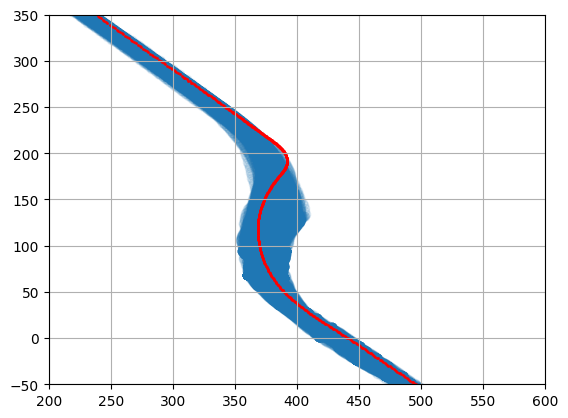

In [10]:
plt.scatter(sector1_23["WORLDPOSX"], sector1_23["WORLDPOSY"], alpha=0.1)
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"], c='red', s=1)
plt.xlim(200, 600)
plt.ylim(-50, 350)
plt.grid(True)
plt.show()

In [11]:
tmp = sector1_23[sector1_23["SESSION_IDENTIFIER"]==9.71858316376882e+16]
tmp[tmp["LAP_NUM"]==1]["SECTOR_1_TIME_MS"].unique()

# since the output is a single number, this tells us that the sector times are the same for each lap,
# not specific to the frame itself

array([29793], dtype=int64)

# Exploring Gears

In [10]:
for x in range(-1, 9):
    s0 = f1_2022_df[f1_2022_df["GEAR"]==x].groupby("SECTOR").count()['FRAME'][0]
    s1 = f1_2022_df[f1_2022_df["GEAR"]==x].groupby("SECTOR").count()['FRAME'][1]
    s2 = f1_2022_df[f1_2022_df["GEAR"]==x].groupby("SECTOR").count()['FRAME'][2]
    print("gear "+str(x)+" was used in sector 0: "+str(s0)+", sector 1: "+str(s1)+", sector 2: "+str(s2))

gear -1 was used in sector 0: 7632, sector 1: 852, sector 2: 11521
gear 0 was used in sector 0: 1535, sector 1: 184, sector 2: 2181
gear 1 was used in sector 0: 33613, sector 1: 4421, sector 2: 50782
gear 2 was used in sector 0: 39503, sector 1: 6100, sector 2: 49402
gear 3 was used in sector 0: 38392, sector 1: 10505, sector 2: 36939
gear 4 was used in sector 0: 29240, sector 1: 16808, sector 2: 33623
gear 5 was used in sector 0: 31145, sector 1: 21652, sector 2: 51512
gear 6 was used in sector 0: 28056, sector 1: 21569, sector 2: 35471
gear 7 was used in sector 0: 22821, sector 1: 27234, sector 2: 26994
gear 8 was used in sector 0: 24223, sector 1: 38703, sector 2: 18640
